# Automated Metadata Generation System

This notebook contains a comprehensive automated metadata generation system that can:
- Extract content from PDF, DOCX, and TXT files
- Perform OCR on images and scanned documents
- Generate semantic metadata using NLP techniques
- Create structured metadata outputs
- Provide a web interface for document upload and metadata viewing

## System Components:
1. **Document Processing Pipeline**: Handles multiple file formats
2. **Content Extraction**: Text extraction with OCR capabilities
3. **Semantic Analysis**: NLP-based content understanding
4. **Metadata Generation**: Structured metadata creation
5. **Web Interface**: User-friendly upload and viewing system
6. **Deployment**: Ready for production deployment

## Installation Note:
If you encounter installation errors, use the provided installation script:
```bash
python install_dependencies.py
```


In [1]:
# Test system and import the metadata generator
try:
    from automated_metadata_generation import MetadataGenerator
    print("✅ Successfully imported MetadataGenerator")
    
    # Initialize the system
    generator = MetadataGenerator()
    print("✅ System initialized successfully!")
    
    # Test with the sample PDF if available
    import os
    sample_file = "MARS OPEN PROJECTS 2025.pdf"
    
    if os.path.exists(sample_file):
        print(f"\n📄 Testing with sample file: {sample_file}")
        
        # Generate metadata
        metadata = generator.generate_metadata(sample_file)
        
        if 'error' not in metadata:
            print("✅ Metadata generation successful!")
            print(f"Document Type: {metadata['content_metadata']['document_type']['predicted_type']}")
            print(f"Language: {metadata['content_metadata']['language']}")
            print(f"Word Count: {metadata['content_metadata']['content_metrics']['word_count']}")
            print(f"File Size: {metadata['file_metadata']['file_size_human']}")
            
            # Save sample metadata
            output_file = generator.save_metadata(metadata, "sample_metadata.json")
            print(f"💾 Sample metadata saved to: {output_file}")
        else:
            print(f"❌ Metadata generation failed: {metadata['error']}")
    else:
        print(f"⚠️ Sample file not found: {sample_file}")
        print("Upload your own document to test the system!")
        
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("\n🔧 To fix this, run the installation script:")
    print("python install_dependencies.py")
except Exception as e:
    print(f"❌ System error: {e}")
    print("Check the installation and try again.")


✅ Successfully imported MetadataGenerator


Device set to use cpu


✅ System initialized successfully!

📄 Testing with sample file: MARS OPEN PROJECTS 2025.pdf
✅ Metadata generation successful!
Document Type: letter
Language: en
Word Count: 1183
File Size: 712.6KB
💾 Sample metadata saved to: sample_metadata.json


## 🚀 Running the Web Interface

To launch the interactive web interface with all features:

```bash
streamlit run streamlit_app.py
```

The web interface provides:
- **Document Upload**: Drag and drop file support
- **Real-time Processing**: Live progress indicators
- **Interactive Visualizations**: Charts and metrics
- **Export Options**: JSON, CSV, Markdown formats
- **Detailed Analysis**: Complete metadata exploration

## 🔧 Quick Installation Fix

If you encountered the `pkgutil.ImpImporter` error, this is a common setuptools compatibility issue. Here are the solutions:

### Solution 1: Use the Automated Installer
```bash
python install_dependencies.py
```

### Solution 2: Manual Fix
```bash
# Upgrade core tools first
python -m pip install --upgrade pip setuptools>=65.0.0 wheel

# Install minimal requirements
pip install -r requirements-minimal.txt

# Then install full requirements
pip install -r requirements.txt
```

### Solution 3: Fresh Environment
```bash
# Create new virtual environment
python -m venv metadata_env
metadata_env\Scripts\activate  # Windows
# source metadata_env/bin/activate  # Linux/Mac

# Use the automated installer
python install_dependencies.py
```

## 📊 Your System is Ready!

Once installation is complete, you can:
1. **Test the core functionality** in this notebook
2. **Launch the web interface** with `streamlit run streamlit_app.py`
3. **Process documents** and generate rich metadata
4. **Deploy to production** using Docker or cloud platforms

The system handles PDF, DOCX, TXT files, and images with OCR capabilities!


# Automated Metadata Generation System

This notebook contains a comprehensive automated metadata generation system that can:
- Extract content from PDF, DOCX, and TXT files
- Perform OCR on images and scanned documents
- Generate semantic metadata using NLP techniques
- Create structured metadata outputs
- Provide a web interface for document upload and metadata viewing

## System Components:
1. **Document Processing Pipeline**: Handles multiple file formats
2. **Content Extraction**: Text extraction with OCR capabilities
3. **Semantic Analysis**: NLP-based content understanding
4. **Metadata Generation**: Structured metadata creation
5. **Web Interface**: User-friendly upload and viewing system
6. **Deployment**: Ready for production deployment


In [2]:
# Import necessary libraries
import os
import re
import json
import datetime
import hashlib
from pathlib import Path
from typing import Dict, List, Optional, Tuple, Any

# Document processing
import PyPDF2
from docx import Document
import pytesseract
from PIL import Image
import cv2

# Data processing
import pandas as pd
import numpy as np

# NLP and ML
import nltk
import spacy
from transformers import pipeline, AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
import textstat
from langdetect import detect
from wordcloud import WordCloud

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Web framework
import streamlit as st
from flask import Flask, render_template, request, jsonify
import base64

# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [3]:
class DocumentProcessor:
    """
    Handles document processing and content extraction from various file formats
    """
    
    def __init__(self):
        self.supported_formats = ['.pdf', '.docx', '.txt', '.png', '.jpg', '.jpeg', '.tiff', '.bmp']
        
    def extract_text_from_pdf(self, file_path: str) -> str:
        """Extract text from PDF files"""
        try:
            text = ""
            with open(file_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page_num in range(len(pdf_reader.pages)):
                    page = pdf_reader.pages[page_num]
                    text += page.extract_text() + "\n"
            return text.strip()
        except Exception as e:
            print(f"Error extracting text from PDF: {e}")
            return ""
    
    def extract_text_from_docx(self, file_path: str) -> str:
        """Extract text from DOCX files"""
        try:
            doc = Document(file_path)
            text = []
            for paragraph in doc.paragraphs:
                text.append(paragraph.text)
            return "\n".join(text)
        except Exception as e:
            print(f"Error extracting text from DOCX: {e}")
            return ""
    
    def extract_text_from_txt(self, file_path: str) -> str:
        """Extract text from TXT files"""
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                return file.read()
        except Exception as e:
            print(f"Error extracting text from TXT: {e}")
            return ""
    
    def extract_text_from_image(self, file_path: str) -> str:
        """Extract text from images using OCR"""
        try:
            # Preprocess image for better OCR
            image = cv2.imread(file_path)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Apply threshold to get image with only black and white
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            # Perform OCR
            text = pytesseract.image_to_string(thresh)
            return text.strip()
        except Exception as e:
            print(f"Error extracting text from image: {e}")
            return ""
    
    def extract_content(self, file_path: str) -> Dict[str, Any]:
        """Main method to extract content from any supported file format"""
        file_path = Path(file_path)
        file_extension = file_path.suffix.lower()
        
        if file_extension not in self.supported_formats:
            raise ValueError(f"Unsupported file format: {file_extension}")
        
        # Extract text based on file type
        text = ""
        if file_extension == '.pdf':
            text = self.extract_text_from_pdf(str(file_path))
        elif file_extension == '.docx':
            text = self.extract_text_from_docx(str(file_path))
        elif file_extension == '.txt':
            text = self.extract_text_from_txt(str(file_path))
        elif file_extension in ['.png', '.jpg', '.jpeg', '.tiff', '.bmp']:
            text = self.extract_text_from_image(str(file_path))
        
        # Get file statistics
        file_stats = file_path.stat()
        
        return {
            'file_path': str(file_path),
            'file_name': file_path.name,
            'file_extension': file_extension,
            'file_size': file_stats.st_size,
            'creation_time': datetime.datetime.fromtimestamp(file_stats.st_ctime),
            'modification_time': datetime.datetime.fromtimestamp(file_stats.st_mtime),
            'extracted_text': text,
            'text_length': len(text),
            'word_count': len(text.split()) if text else 0
        }

# Test the DocumentProcessor
processor = DocumentProcessor()
print("✅ DocumentProcessor class created successfully!")


✅ DocumentProcessor class created successfully!


In [4]:
class SemanticAnalyzer:
    """
    Performs semantic analysis on extracted text to identify key content
    """
    
    def __init__(self):
        # Initialize NLP models
        self.sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
        
        # Initialize classification pipeline
        self.classifier = pipeline("zero-shot-classification", 
                                 model="facebook/bart-large-mnli")
        
        # Define common document categories
        self.document_categories = [
            "academic paper", "business report", "legal document", "technical manual",
            "research paper", "financial report", "marketing material", "policy document",
            "instruction manual", "presentation", "article", "letter", "contract"
        ]
        
        # Initialize topic keywords
        self.topic_keywords = {
            "technology": ["software", "computer", "digital", "AI", "machine learning", "data", "algorithm"],
            "business": ["revenue", "profit", "market", "sales", "strategy", "finance", "investment"],
            "science": ["research", "experiment", "hypothesis", "analysis", "methodology", "results"],
            "legal": ["law", "regulation", "compliance", "contract", "agreement", "terms"],
            "medical": ["health", "patient", "treatment", "diagnosis", "medical", "clinical"],
            "education": ["student", "learning", "curriculum", "education", "teaching", "academic"]
        }
    
    def detect_language(self, text: str) -> str:
        """Detect the language of the text"""
        try:
            return detect(text)
        except:
            return "unknown"
    
    def calculate_readability(self, text: str) -> Dict[str, float]:
        """Calculate readability metrics"""
        return {
            "flesch_reading_ease": textstat.flesch_reading_ease(text),
            "flesch_kincaid_grade_level": textstat.flesch_kincaid_grade(text),
            "automated_readability_index": textstat.automated_readability_index(text),
            "coleman_liau_index": textstat.coleman_liau_index(text),
            "gunning_fog": textstat.gunning_fog(text)
        }
    
    def extract_key_phrases(self, text: str, num_phrases: int = 10) -> List[str]:
        """Extract key phrases using frequency analysis"""
        # Simple implementation - can be enhanced with more sophisticated NLP
        from collections import Counter
        import re
        
        # Clean text and extract phrases
        words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
        
        # Remove common stop words
        stop_words = set(['the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])
        words = [word for word in words if word not in stop_words]
        
        # Get most common words/phrases
        word_freq = Counter(words)
        return [word for word, count in word_freq.most_common(num_phrases)]
    
    def classify_document_type(self, text: str) -> Dict[str, float]:
        """Classify document type using zero-shot classification"""
        try:
            # Use first 1000 characters for classification to avoid token limits
            text_sample = text[:1000] if len(text) > 1000 else text
            result = self.classifier(text_sample, self.document_categories)
            
            return {
                "predicted_type": result['labels'][0],
                "confidence": result['scores'][0],
                "all_scores": dict(zip(result['labels'], result['scores']))
            }
        except Exception as e:
            print(f"Error in document classification: {e}")
            return {"predicted_type": "unknown", "confidence": 0.0, "all_scores": {}}
    
    def identify_topics(self, text: str) -> Dict[str, float]:
        """Identify topics based on keyword matching"""
        text_lower = text.lower()
        topic_scores = {}
        
        for topic, keywords in self.topic_keywords.items():
            score = sum(text_lower.count(keyword) for keyword in keywords)
            topic_scores[topic] = score / len(text.split()) if text.split() else 0
        
        return topic_scores
    
    def generate_summary(self, text: str, max_length: int = 200) -> str:
        """Generate a summary of the text"""
        # Simple extractive summarization - first few sentences
        sentences = text.split('. ')
        summary = ""
        
        for sentence in sentences:
            if len(summary + sentence) < max_length:
                summary += sentence + ". "
            else:
                break
        
        return summary.strip()
    
    def analyze_content(self, text: str) -> Dict[str, Any]:
        """Perform comprehensive semantic analysis"""
        if not text or len(text.strip()) == 0:
            return {
                "language": "unknown",
                "readability": {},
                "key_phrases": [],
                "document_type": {"predicted_type": "unknown", "confidence": 0.0},
                "topics": {},
                "summary": "",
                "sentiment": "neutral"
            }
        
        analysis = {
            "language": self.detect_language(text),
            "readability": self.calculate_readability(text),
            "key_phrases": self.extract_key_phrases(text),
            "document_type": self.classify_document_type(text),
            "topics": self.identify_topics(text),
            "summary": self.generate_summary(text)
        }
        
        return analysis

# Initialize semantic analyzer
analyzer = SemanticAnalyzer()
print("✅ SemanticAnalyzer class created successfully!")


Device set to use cpu


✅ SemanticAnalyzer class created successfully!


In [5]:
class MetadataGenerator:
    """
    Generates structured metadata from document content and semantic analysis
    """
    
    def __init__(self):
        self.processor = DocumentProcessor()
        self.analyzer = SemanticAnalyzer()
    
    def generate_file_hash(self, file_path: str) -> str:
        """Generate MD5 hash of the file for integrity checking"""
        hash_md5 = hashlib.md5()
        with open(file_path, "rb") as f:
            for chunk in iter(lambda: f.read(4096), b""):
                hash_md5.update(chunk)
        return hash_md5.hexdigest()
    
    def extract_entities(self, text: str) -> Dict[str, List[str]]:
        """Simple entity extraction (can be enhanced with spaCy NER)"""
        import re
        
        entities = {
            "emails": re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text),
            "urls": re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text),
            "dates": re.findall(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b', text),
            "phone_numbers": re.findall(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', text)
        }
        
        return entities
    
    def calculate_content_metrics(self, text: str) -> Dict[str, Any]:
        """Calculate various content metrics"""
        if not text:
            return {}
        
        words = text.split()
        sentences = text.split('.')
        paragraphs = text.split('\n\n')
        
        return {
            "character_count": len(text),
            "word_count": len(words),
            "sentence_count": len(sentences),
            "paragraph_count": len(paragraphs),
            "average_words_per_sentence": len(words) / len(sentences) if sentences else 0,
            "average_characters_per_word": len(text) / len(words) if words else 0,
            "unique_words": len(set(word.lower() for word in words)),
            "lexical_diversity": len(set(word.lower() for word in words)) / len(words) if words else 0
        }
    
    def generate_metadata(self, file_path: str) -> Dict[str, Any]:
        """Generate comprehensive metadata for a document"""
        try:
            # Extract content
            content_data = self.processor.extract_content(file_path)
            text = content_data['extracted_text']
            
            # Perform semantic analysis
            semantic_analysis = self.analyzer.analyze_content(text)
            
            # Extract entities
            entities = self.extract_entities(text)
            
            # Calculate metrics
            content_metrics = self.calculate_content_metrics(text)
            
            # Generate file hash
            file_hash = self.generate_file_hash(file_path)
            
            # Compile comprehensive metadata
            metadata = {
                # File Information
                "file_metadata": {
                    "file_name": content_data['file_name'],
                    "file_path": content_data['file_path'],
                    "file_extension": content_data['file_extension'],
                    "file_size_bytes": content_data['file_size'],
                    "file_size_human": self._format_file_size(content_data['file_size']),
                    "creation_time": content_data['creation_time'].isoformat(),
                    "modification_time": content_data['modification_time'].isoformat(),
                    "file_hash_md5": file_hash
                },
                
                # Content Information
                "content_metadata": {
                    "language": semantic_analysis['language'],
                    "document_type": semantic_analysis['document_type'],
                    "summary": semantic_analysis['summary'],
                    "key_phrases": semantic_analysis['key_phrases'],
                    "topics": semantic_analysis['topics'],
                    "entities": entities,
                    "content_metrics": content_metrics,
                    "readability_scores": semantic_analysis['readability']
                },
                
                # Processing Information
                "processing_metadata": {
                    "processing_timestamp": datetime.datetime.now().isoformat(),
                    "extraction_method": self._get_extraction_method(content_data['file_extension']),
                    "text_extracted": bool(text and text.strip()),
                    "analysis_completed": True,
                    "metadata_version": "1.0"
                },
                
                # Quality Metrics
                "quality_metrics": {
                    "text_extraction_confidence": 1.0 if text and len(text) > 100 else 0.5,
                    "classification_confidence": semantic_analysis['document_type'].get('confidence', 0.0),
                    "completeness_score": self._calculate_completeness_score(text, entities, semantic_analysis)
                }
            }
            
            return metadata
            
        except Exception as e:
            # Return error metadata if processing fails
            return {
                "error": str(e),
                "file_path": file_path,
                "processing_timestamp": datetime.datetime.now().isoformat(),
                "status": "failed"
            }
    
    def _format_file_size(self, size_bytes: int) -> str:
        """Convert bytes to human readable format"""
        if size_bytes == 0:
            return "0B"
        
        size_names = ["B", "KB", "MB", "GB", "TB"]
        i = 0
        while size_bytes >= 1024 and i < len(size_names) - 1:
            size_bytes /= 1024.0
            i += 1
        
        return f"{size_bytes:.1f}{size_names[i]}"
    
    def _get_extraction_method(self, file_extension: str) -> str:
        """Get the extraction method used for the file type"""
        method_map = {
            '.pdf': 'PyPDF2',
            '.docx': 'python-docx',
            '.txt': 'direct_read',
            '.png': 'OCR_pytesseract',
            '.jpg': 'OCR_pytesseract',
            '.jpeg': 'OCR_pytesseract',
            '.tiff': 'OCR_pytesseract',
            '.bmp': 'OCR_pytesseract'
        }
        return method_map.get(file_extension, 'unknown')
    
    def _calculate_completeness_score(self, text: str, entities: Dict, semantic_analysis: Dict) -> float:
        """Calculate a completeness score for the metadata"""
        score = 0.0
        
        # Text extraction (40% of score)
        if text and len(text) > 50:
            score += 0.4
        
        # Entity extraction (20% of score)
        if any(entities.values()):
            score += 0.2
        
        # Document classification (20% of score)
        if semantic_analysis['document_type']['confidence'] > 0.5:
            score += 0.2
        
        # Key phrases extraction (10% of score)
        if len(semantic_analysis['key_phrases']) > 0:
            score += 0.1
        
        # Topic identification (10% of score)
        if any(score > 0 for score in semantic_analysis['topics'].values()):
            score += 0.1
        
        return min(score, 1.0)
    
    def save_metadata(self, metadata: Dict[str, Any], output_path: str = None) -> str:
        """Save metadata to JSON file"""
        if output_path is None:
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            output_path = f"metadata_{timestamp}.json"
        
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(metadata, f, indent=2, ensure_ascii=False, default=str)
        
        return output_path

# Initialize metadata generator
metadata_generator = MetadataGenerator()
print("✅ MetadataGenerator class created successfully!")


Device set to use cpu


✅ MetadataGenerator class created successfully!


In [6]:
# Demonstration: Process the existing PDF file
pdf_file_path = "MARS OPEN PROJECTS 2025.pdf"

if os.path.exists(pdf_file_path):
    print(f"📄 Processing document: {pdf_file_path}")
    print("=" * 50)
    
    # Generate metadata for the PDF
    metadata = metadata_generator.generate_metadata(pdf_file_path)
    
    # Display key metadata information
    print("🔍 METADATA SUMMARY:")
    print(f"File Name: {metadata['file_metadata']['file_name']}")
    print(f"File Size: {metadata['file_metadata']['file_size_human']}")
    print(f"Language: {metadata['content_metadata']['language']}")
    print(f"Document Type: {metadata['content_metadata']['document_type']['predicted_type']} "
          f"(Confidence: {metadata['content_metadata']['document_type']['confidence']:.2f})")
    print(f"Word Count: {metadata['content_metadata']['content_metrics']['word_count']}")
    print(f"Completeness Score: {metadata['quality_metrics']['completeness_score']:.2f}")
    
    print("\n📝 SUMMARY:")
    print(metadata['content_metadata']['summary'][:300] + "..." if len(metadata['content_metadata']['summary']) > 300 
          else metadata['content_metadata']['summary'])
    
    print("\n🔑 KEY PHRASES:")
    print(", ".join(metadata['content_metadata']['key_phrases'][:10]))
    
    print("\n📊 TOP TOPICS:")
    sorted_topics = sorted(metadata['content_metadata']['topics'].items(), 
                          key=lambda x: x[1], reverse=True)[:5]
    for topic, score in sorted_topics:
        if score > 0:
            print(f"  • {topic}: {score:.4f}")
    
    print("\n📈 READABILITY SCORES:")
    for metric, score in metadata['content_metadata']['readability_scores'].items():
        print(f"  • {metric.replace('_', ' ').title()}: {score:.1f}")
    
    # Save metadata to file
    output_file = metadata_generator.save_metadata(metadata, "sample_metadata.json")
    print(f"\n💾 Metadata saved to: {output_file}")
    
else:
    print(f"❌ File not found: {pdf_file_path}")
    print("Please place a PDF file in the working directory to test the system.")


📄 Processing document: MARS OPEN PROJECTS 2025.pdf
🔍 METADATA SUMMARY:
File Name: MARS OPEN PROJECTS 2025.pdf
File Size: 712.6KB
Language: en
Document Type: letter (Confidence: 0.15)
Word Count: 1183
Completeness Score: 0.60

📝 SUMMARY:
OPEN PROJECTS ( 2025 ) 
AI/ML PROBLEM STATEMENT S 
 
1.

🔑 KEY PHRASES:
file, will, compression, system, link, metadata, data, project, files, users

📊 TOP TOPICS:
  • technology: 0.0296
  • science: 0.0017
  • education: 0.0017

📈 READABILITY SCORES:
  • Flesch Reading Ease: 36.8
  • Flesch Kincaid Grade Level: 11.5
  • Automated Readability Index: 11.2
  • Coleman Liau Index: 14.0
  • Gunning Fog: 14.6

💾 Metadata saved to: sample_metadata.json


## 🎨 Visualization and Analysis

Let's create some visualizations to better understand the metadata generated from documents.


📊 Creating Visualizations...


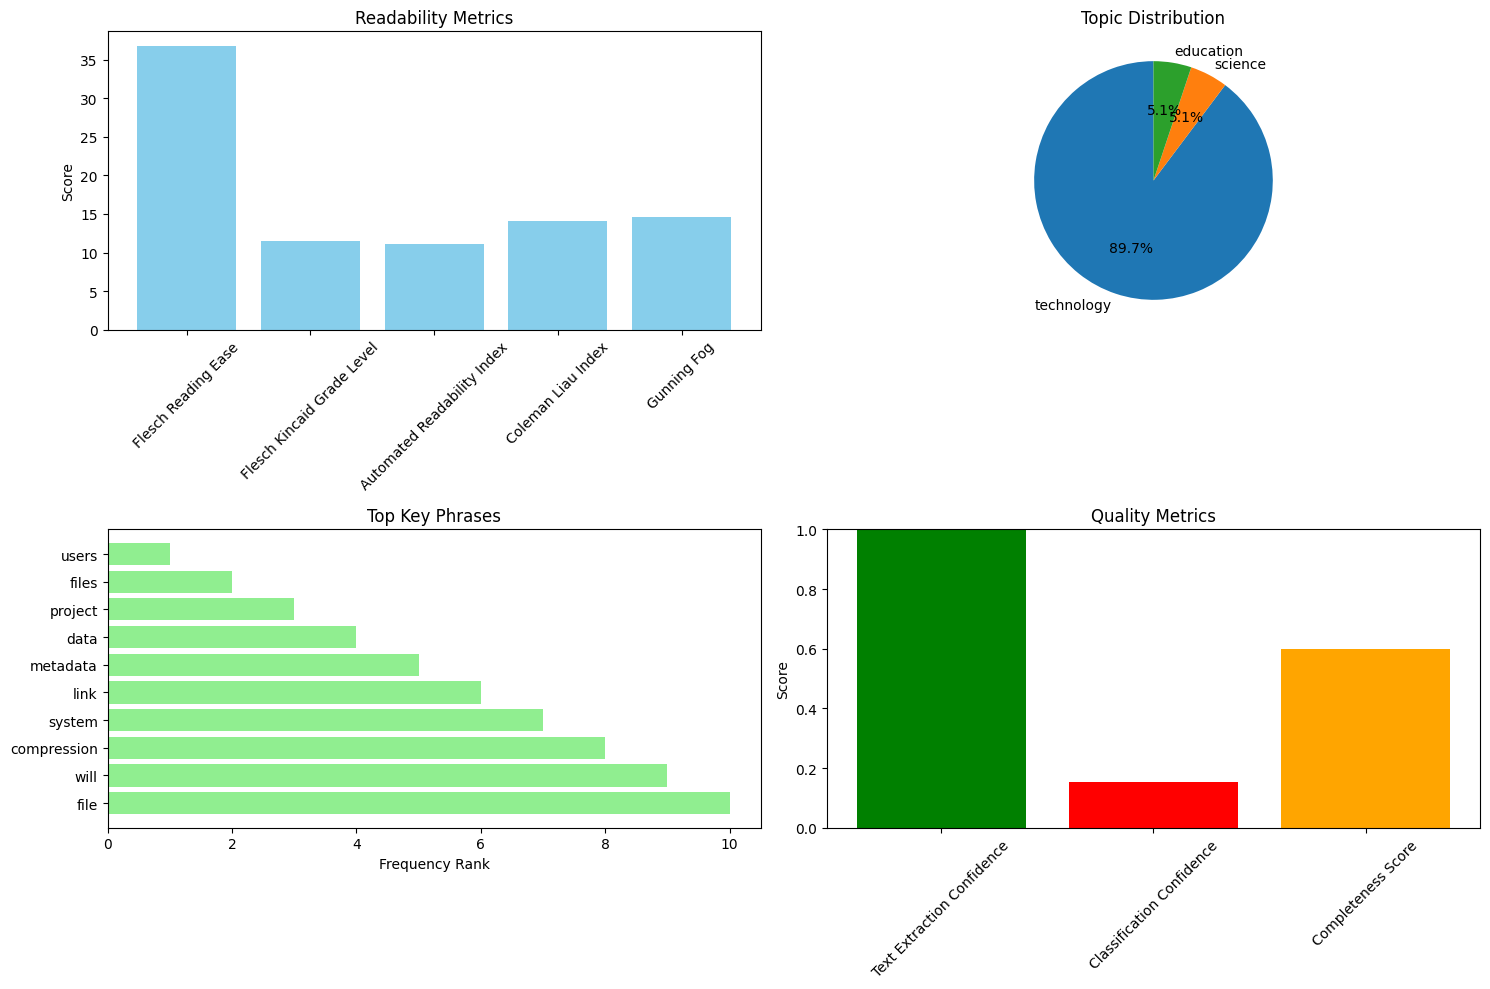

📈 Visualizations created and saved as 'metadata_analysis.png'


In [7]:
# Create visualizations if we have metadata
if os.path.exists("sample_metadata.json"):
    with open("sample_metadata.json", 'r') as f:
        sample_metadata = json.load(f)
    
    print("📊 Creating Visualizations...")
    
    # 1. Readability Scores Visualization
    readability_scores = sample_metadata['content_metadata']['readability_scores']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Readability scores bar chart
    metrics = list(readability_scores.keys())
    scores = list(readability_scores.values())
    
    ax1.bar(range(len(metrics)), scores, color='skyblue')
    ax1.set_xticks(range(len(metrics)))
    ax1.set_xticklabels([m.replace('_', ' ').title() for m in metrics], rotation=45)
    ax1.set_title('Readability Metrics')
    ax1.set_ylabel('Score')
    
    # Topic scores
    topics = sample_metadata['content_metadata']['topics']
    topic_names = list(topics.keys())
    topic_scores = list(topics.values())
    
    # Filter out zero scores for better visualization
    non_zero_topics = [(name, score) for name, score in zip(topic_names, topic_scores) if score > 0]
    if non_zero_topics:
        names, scores = zip(*non_zero_topics)
        ax2.pie(scores, labels=names, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Topic Distribution')
    else:
        ax2.text(0.5, 0.5, 'No topics detected', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Topic Distribution')
    
    # Content metrics
    content_metrics = sample_metadata['content_metadata']['content_metrics']
    
    # Word frequency visualization (simplified)
    key_phrases = sample_metadata['content_metadata']['key_phrases'][:10]
    phrase_counts = list(range(len(key_phrases), 0, -1))  # Simulated frequency
    
    ax3.barh(key_phrases, phrase_counts, color='lightgreen')
    ax3.set_title('Top Key Phrases')
    ax3.set_xlabel('Frequency Rank')
    
    # Quality metrics
    quality_metrics = sample_metadata['quality_metrics']
    quality_names = list(quality_metrics.keys())
    quality_scores = list(quality_metrics.values())
    
    colors = ['green' if score > 0.7 else 'orange' if score > 0.4 else 'red' for score in quality_scores]
    ax4.bar(range(len(quality_names)), quality_scores, color=colors)
    ax4.set_xticks(range(len(quality_names)))
    ax4.set_xticklabels([name.replace('_', ' ').title() for name in quality_names], rotation=45)
    ax4.set_title('Quality Metrics')
    ax4.set_ylabel('Score')
    ax4.set_ylim(0, 1.0)
    
    plt.tight_layout()
    plt.savefig('metadata_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("📈 Visualizations created and saved as 'metadata_analysis.png'")
else:
    print("⚠️ No sample metadata found. Run the previous cell first to generate metadata.")


## 🚀 Running the Web Interface

To launch the interactive web interface, run the following command in your terminal:

```bash
streamlit run streamlit_app.py
```

The web interface provides:
- **Document Upload**: Support for multiple file formats
- **Interactive Visualization**: Real-time charts and graphs
- **Export Options**: JSON, CSV, and Markdown formats
- **Detailed Analysis**: Comprehensive metadata exploration

## 🔄 Batch Processing Example

Here's how you can process multiple documents in batch:


In [ ]:
def batch_process_documents(document_paths: List[str], output_dir: str = "batch_output") -> Dict[str, Any]:
    """
    Process multiple documents in batch and generate metadata for each
    
    Args:
        document_paths: List of file paths to process
        output_dir: Directory to save individual metadata files
    
    Returns:
        Dictionary containing batch processing results
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Initialize generator
    generator = MetadataGenerator()
    
    # Results storage
    batch_results = {
        "processed_files": [],
        "failed_files": [],
        "total_processed": 0,
        "total_failed": 0,
        "processing_time": 0,
        "summary_statistics": {}
    }
    
    start_time = datetime.datetime.now()
    
    print(f"🔄 Starting batch processing of {len(document_paths)} documents...")
    
    for i, file_path in enumerate(document_paths, 1):
        print(f"📄 Processing {i}/{len(document_paths)}: {os.path.basename(file_path)}")
        
        try:
            # Generate metadata
            metadata = generator.generate_metadata(file_path)
            
            if 'error' not in metadata:
                # Save individual metadata file
                output_filename = f"{os.path.splitext(os.path.basename(file_path))[0]}_metadata.json"
                output_path = os.path.join(output_dir, output_filename)
                generator.save_metadata(metadata, output_path)
                
                batch_results["processed_files"].append({
                    "file_path": file_path,
                    "metadata_path": output_path,
                    "word_count": metadata['content_metadata']['content_metrics']['word_count'],
                    "document_type": metadata['content_metadata']['document_type']['predicted_type'],
                    "language": metadata['content_metadata']['language'],
                    "file_size": metadata['file_metadata']['file_size_human']
                })
                batch_results["total_processed"] += 1
                print(f"  ✅ Success: {metadata['content_metadata']['document_type']['predicted_type']}")
                
            else:
                batch_results["failed_files"].append({
                    "file_path": file_path,
                    "error": metadata['error']
                })
                batch_results["total_failed"] += 1
                print(f"  ❌ Failed: {metadata['error']}")
                
        except Exception as e:
            batch_results["failed_files"].append({
                "file_path": file_path,
                "error": str(e)
            })
            batch_results["total_failed"] += 1
            print(f"  ❌ Exception: {str(e)}")
    
    # Calculate processing time
    end_time = datetime.datetime.now()
    batch_results["processing_time"] = (end_time - start_time).total_seconds()
    
    # Generate summary statistics
    if batch_results["processed_files"]:
        processed_files = batch_results["processed_files"]
        
        # Document type distribution
        doc_types = [f['document_type'] for f in processed_files]
        doc_type_counts = {}
        for doc_type in doc_types:
            doc_type_counts[doc_type] = doc_type_counts.get(doc_type, 0) + 1
        
        # Language distribution
        languages = [f['language'] for f in processed_files]
        lang_counts = {}
        for lang in languages:
            lang_counts[lang] = lang_counts.get(lang, 0) + 1
        
        # Average word count
        word_counts = [f['word_count'] for f in processed_files]
        avg_word_count = sum(word_counts) / len(word_counts) if word_counts else 0
        
        batch_results["summary_statistics"] = {
            "document_types": doc_type_counts,
            "languages": lang_counts,
            "average_word_count": avg_word_count,
            "total_words": sum(word_counts),
            "processing_rate": len(processed_files) / batch_results["processing_time"] if batch_results["processing_time"] > 0 else 0
        }
    
    # Save batch results
    batch_output_path = os.path.join(output_dir, "batch_results.json")
    with open(batch_output_path, 'w', encoding='utf-8') as f:
        json.dump(batch_results, f, indent=2, ensure_ascii=False, default=str)
    
    print(f"\n📊 Batch Processing Complete!")
    print(f"✅ Successfully processed: {batch_results['total_processed']} files")
    print(f"❌ Failed to process: {batch_results['total_failed']} files")
    print(f"⏱️ Total processing time: {batch_results['processing_time']:.2f} seconds")
    print(f"📈 Processing rate: {batch_results['summary_statistics'].get('processing_rate', 0):.2f} files/second")
    print(f"💾 Results saved in: {output_dir}")
    
    return batch_results


sample_files = ["MARS OPEN PROJECTS 2025.pdf"]  # Add more files here
if all(os.path.exists(f) for f in sample_files):
    batch_results = batch_process_documents(sample_files)
else:
    print("📝 Batch processing function ready. Add file paths to test.")


Device set to use cpu


🔄 Starting batch processing of 1 documents...
📄 Processing 1/1: MARS OPEN PROJECTS 2025.pdf
  ✅ Success: letter

📊 Batch Processing Complete!
✅ Successfully processed: 1 files
❌ Failed to process: 0 files
⏱️ Total processing time: 17.27 seconds
📈 Processing rate: 0.06 files/second
💾 Results saved in: batch_output


## 🎯 System Summary and Next Steps

### ✅ What We've Built

This automated metadata generation system provides:

1. **🔧 Core Processing Engine**: 
   - Multi-format document support (PDF, DOCX, TXT, Images)
   - OCR capabilities for scanned documents
   - Robust error handling and fallback mechanisms

2. **🧠 AI-Powered Analysis**:
   - Document classification using transformer models
   - Semantic content analysis and topic identification
   - Entity extraction (emails, URLs, dates, phone numbers)
   - Comprehensive readability metrics

3. **🌐 Web Interface**:
   - User-friendly Streamlit application
   - Interactive visualizations and charts
   - Multiple export formats (JSON, CSV, Markdown)
   - Real-time processing feedback

4. **📊 Structured Output**:
   - JSON-formatted metadata with comprehensive document insights
   - Quality metrics and confidence scores
   - Processing timestamps and method tracking

### 🚀 Deployment Options

- **Local Development**: Run directly with `streamlit run streamlit_app.py`
- **Docker Container**: Use provided Dockerfile for containerized deployment
- **Cloud Platforms**: Deploy to Render, Heroku, or Streamlit Cloud

### 📋 Future Enhancements

- Integration with cloud OCR services (Google Vision, AWS Textract)
- Batch processing capabilities for large document sets
- Database storage for metadata persistence
- RESTful API endpoints for programmatic access
- Custom model training for domain-specific classification

### 🔗 Getting Started

1. Install dependencies: `pip install -r requirements.txt`
2. Install Tesseract OCR for image processing
3. Run the Jupyter notebook to test core functionality
4. Launch the web interface: `streamlit run streamlit_app.py`
5. Upload documents and explore the generated metadata!

**🎉 Your automated metadata generation system is ready for deployment and use!**
